In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [23]:
data = pd.read_csv("microbial_growth_curve.csv")
print(data.columns)
data = data.rename(columns={"t [h]":"time_hours", "microbes(g)":"microbes_grams"})
data.head()

Index(['t [h]', 'microbes(g)'], dtype='object')


,time_hours,microbes_grams
0,0.000000,0.128
1,0.166667,0.130
2,0.333333,0.133
3,0.500000,0.131
4,0.666667,0.130


In [24]:
data.dtypes

time_hours        float64
microbes_grams    float64
dtype: object

In [25]:
data = data.sort_values(by="time_hours")

In [26]:
x = data["time_hours"]
y = data["microbes_grams"]

In [27]:
xNum = data["time_hours"] - data["time_hours"].min()
xNum

0       0.000000
1       0.166667
2       0.333333
3       0.500000
4       0.666667
         ...    
512    85.253056
513    85.419722
514    85.586667
515    85.753333
516    85.920000
Name: time_hours, Length: 517, dtype: float64

In [29]:
def logisticCurve(t,k, t0, r):
    return k/(1+np.exp(-r*(t-t0)))

totalLen = len(x)
if totalLen%2==0:
    middleIdx = totalLen//2 -1
else:
    middleIdx = totalLen//2

initialK=y[0]

initialT0=pd.Timestamp(x[middleIdx]).year
initialR=1/initialT0

popt, pcov = curve_fit(logisticCurve, x, y, p0=(initialK, initialT0, initialR))
k, t0,r = popt
print("Optimized parameters", popt)

Optimized parameters [ 0.8012723  45.47341302  0.05191061]


In [31]:
ypred = logisticCurve(x, k, t0,r)

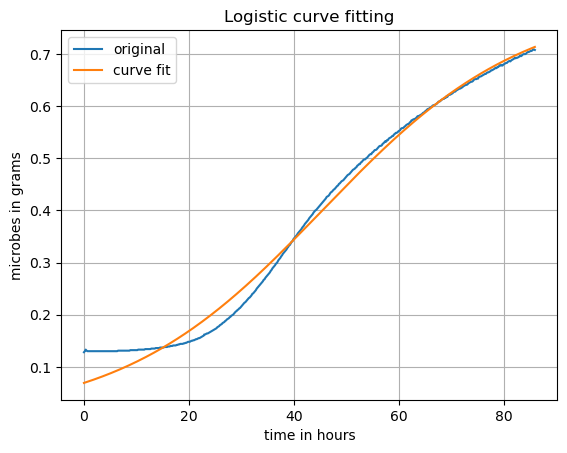

In [32]:
plt.plot(x, y, label="original")
plt.plot(x, ypred, label="curve fit")
plt.xlabel("time in hours")
plt.ylabel("microbes in grams")
plt.title("Logistic curve fitting")
plt.legend()
plt.grid()

([<matplotlib.axis.YTick at 0x7fc075490860>,
 [Text(0, 0, '0'), Text(0, 1, '1'), Text(0, 2, '2')])

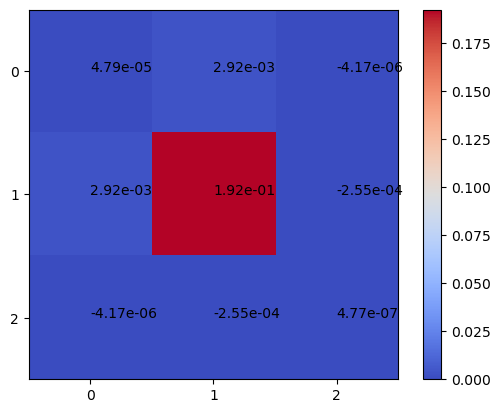

In [46]:
covMat = plt.imshow(pcov, cmap="coolwarm")
plt.colorbar(covMat)

for i in range(pcov.shape[0]):
    for j in range(pcov.shape[1]):
        plt.text(j,i, f"{pcov[i,j]:.2e}")

plt.xticks([0,1,2])
plt.yticks([0,1,2])

In [48]:
r2 = r2_score(y, ypred)
r2

0.9895831650035289